<a href="https://colab.research.google.com/github/Yunjimin/GUI-project/blob/master/Chapter3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

영화 리뷰 분류: 이진 분류 예제


In [10]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [11]:
# 정수 시퀀스를 이진 행렬로 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension), 모든 원소가 0인 행렬
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  # result[i]에서 특정 인덱스의 위치를 1로 만듦.

  return results

x_train = vectorize_sequences(train_data) #훈련 데이터를 벡터로 변환

x_text = vectorize_sequences(test_data) #테스트 데이터를 벡터로 변환


In [3]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:

# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
#모델 정의하기

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
#모델 컴파일하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss= losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [17]:
#검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [18]:
#모델 훈련하기

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val,y_val))



Epoch 1/20
30/30 [==============================] - 3s 35ms/step - loss: 0.5823 - acc: 0.7064 - val_loss: 0.3756 - val_acc: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3049 - acc: 0.9055 - val_loss: 0.3001 - val_acc: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2165 - acc: 0.9332 - val_loss: 0.2765 - val_acc: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1634 - acc: 0.9529 - val_loss: 0.2735 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1327 - acc: 0.9606 - val_loss: 0.2807 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1074 - acc: 0.9707 - val_loss: 0.2949 - val_acc: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0864 - acc: 0.9774 - val_loss: 0.4118 - val_acc: 0.8604
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0808 - a

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

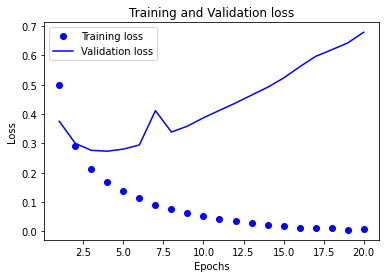

In [22]:
#훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss") # bo는 파란색 점
plt.plot(epochs, val_loss, 'b', label="Validation loss") # bo는 파란색 점

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


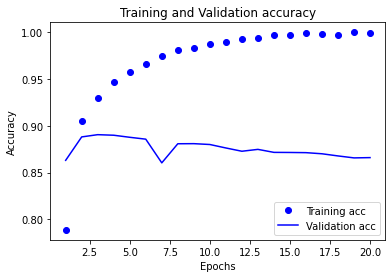

In [23]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc") # bo는 파란색 점
plt.plot(epochs, val_acc, 'b', label="Validation acc") # bo는 파란색 점

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [24]:
#모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_text,y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.5511 - accuracy: 0.7407
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2701 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1989 - accuracy: 0.9331
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2908 - accuracy: 0.8858


In [25]:
results

[0.2908153235912323, 0.8857600092887878]

In [28]:
model.predict(x_text)

array([[0.1468932 ],
       [0.9997613 ],
       [0.8435596 ],
       ...,
       [0.09678413],
       [0.07088342],
       [0.61211073]], dtype=float32)